In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names
print("Data Shape:", X.shape)
print("Classes:", target_names)

Data Shape: (569, 30)
Classes: ['malignant' 'benign']


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
labels_mapped = np.where(clusters == 1, 0, 1)
print("\nConfusion Matrix:")
print(confusion_matrix(y, labels_mapped))
print("Accuracy:", accuracy_score(y, labels_mapped))


Confusion Matrix:
[[176  36]
 [ 18 339]]
Accuracy: 0.9050966608084359


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

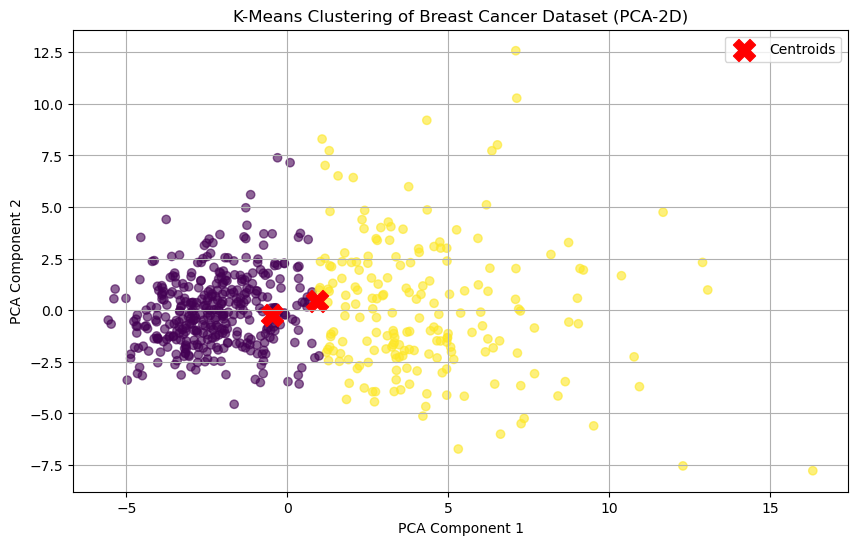

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=250, marker='X', c='red', label='Centroids')
plt.title("K-Means Clustering of Breast Cancer Dataset (PCA-2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()